In [2]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

#install.packages("adegenet",repos='http://cran.us.r-project.org', dependencies = TRUE)
library(BGLR)
#library(coda)
library(tidyverse)
library(ggplot2)
#library(BMTME)
library(reshape2)
library(PerformanceAnalytics)

setwd("/panicle/ssapkot/GrainComp/")

### Training Population size Comparison By Population

In [26]:
### Load phenotypic file and melt
RIL = read.csv("results/Predictability_BTx642_TPsize_accuracy.csv")
RIL$TPsize <- as.factor(RIL$TPsize)
RIL = RIL[,c(2,1,3,4)]
RIL$Pop <- 'RILs'
head(RIL)
str(RIL)

GSDP = read.csv("results//Predictability_SAP_TPsize_accuracy.csv")
GSDP$TPsize <- as.factor(GSDP$TPsize)
GSDP$Pop <- 'GSDP'
head(GSDP)
str(GSDP)

Trait,TPsize,Seed,r,Pop
Amylose,24,12345,-0.13294496,RILs
Amylose,24,12346,0.02025409,RILs
Amylose,24,12347,0.27609776,RILs
Amylose,24,12348,0.24559960,RILs
Amylose,24,12349,0.46600749,RILs
Amylose,24,12350,0.03338263,RILs


'data.frame':	750 obs. of  5 variables:
 $ Trait : Factor w/ 5 levels "Amylose","Fat",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TPsize: Factor w/ 5 levels "24","48","96",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Seed  : int  12345 12346 12347 12348 12349 12350 12351 12352 12353 12354 ...
 $ r     : num  -0.1329 0.0203 0.2761 0.2456 0.466 ...
 $ Pop   : chr  "RILs" "RILs" "RILs" "RILs" ...


Trait,TPsize,Seed,r,Pop
Amylose,24,12345,-0.3620919,GSDP
Amylose,24,12346,-0.3901995,GSDP
Amylose,24,12347,-0.2513406,GSDP
Amylose,24,12348,0.1723076,GSDP
Amylose,24,12349,0.2151563,GSDP
Amylose,24,12350,-0.6788123,GSDP


'data.frame':	750 obs. of  5 variables:
 $ Trait : Factor w/ 5 levels "Amylose","Cal.g",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TPsize: Factor w/ 5 levels "24","48","96",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Seed  : int  12345 12346 12347 12348 12349 12350 12351 12352 12353 12354 ...
 $ r     : num  -0.362 -0.39 -0.251 0.172 0.215 ...
 $ Pop   : chr  "GSDP" "GSDP" "GSDP" "GSDP" ...


#### Amylose

In [12]:
Traits <- c('Amylose','Starch','Protein','Fat','Cal.g')

for
ril = RIL %>% filter(Trait=="Amylose")
sap = GSDP %>% filter(Trait=="Amylose")

ano_ril = aov(r~TPsize, data=ril)
ano_sap = aov(r~TPsize, data=sap)

print("Anova and HSD for RIL")
summary(ano_ril)
TukeyHSD(ano_ril)

print("#####################")

print("Anova and HSD for SAP")
summary(ano_sap)
TukeyHSD(ano_sap)

[1] "Anova and HSD for RIL"


             Df Sum Sq Mean Sq F value Pr(>F)    
TPsize        4  4.696  1.1741   71.07 <2e-16 ***
Residuals   145  2.395  0.0165                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ TPsize, data = ril)

$TPsize
              diff         lwr       upr     p adj
48-24   0.20388602  0.11221110 0.2955609 0.0000001
96-24   0.39273020  0.30105527 0.4844051 0.0000000
132-24  0.44473776  0.35306283 0.5364127 0.0000000
152-24  0.46663470  0.37495977 0.5583096 0.0000000
96-48   0.18884418  0.09716925 0.2805191 0.0000007
132-48  0.24085174  0.14917681 0.3325267 0.0000000
152-48  0.26274868  0.17107375 0.3544236 0.0000000
132-96  0.05200756 -0.03966736 0.1436825 0.5208595
152-96  0.07390450 -0.01777042 0.1655794 0.1756954
152-132 0.02189694 -0.06977799 0.1135719 0.9645371


[1] "#####################"
[1] "Anova and HSD for SAP"


             Df Sum Sq Mean Sq F value   Pr(>F)    
TPsize        4  2.629  0.6572   20.78 1.48e-13 ***
Residuals   145  4.587  0.0316                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ TPsize, data = sap)

$TPsize
              diff         lwr       upr     p adj
48-24   0.10514307 -0.02171124 0.2319974 0.1541813
96-24   0.20668351  0.07982921 0.3335378 0.0001332
192-24  0.30539294  0.17853864 0.4322473 0.0000000
288-24  0.36595078  0.23909648 0.4928051 0.0000000
96-48   0.10154044 -0.02531387 0.2283947 0.1814352
192-48  0.20024987  0.07339557 0.3271042 0.0002345
288-48  0.26080771  0.13395341 0.3876620 0.0000007
192-96  0.09870943 -0.02814488 0.2255637 0.2051555
288-96  0.15926727  0.03241297 0.2861216 0.0061210
288-192 0.06055784 -0.06629647 0.1874121 0.6800428


#### Key Points

#### Starch

In [13]:
ril = RIL %>% filter(Trait=="Starch")
sap = GSDP %>% filter(Trait=="Starch")

ano_ril = aov(r~TPsize, data=ril)
ano_sap = aov(r~TPsize, data=sap)
print("Anova and HSD for RIL")
summary(ano_ril)
TukeyHSD(ano_ril)

print("#####################")

print("Anova and HSD for SAP")
summary(ano_sap)
TukeyHSD(ano_sap)

[1] "Anova and HSD for RIL"


             Df Sum Sq Mean Sq F value Pr(>F)    
TPsize        4  4.190  1.0476   56.31 <2e-16 ***
Residuals   145  2.697  0.0186                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ TPsize, data = ril)

$TPsize
              diff         lwr       upr     p adj
48-24   0.21668326  0.11940117 0.3139653 0.0000001
96-24   0.38199668  0.28471459 0.4792788 0.0000000
132-24  0.41875272  0.32147064 0.5160348 0.0000000
152-24  0.44878092  0.35149883 0.5460630 0.0000000
96-48   0.16531342  0.06803133 0.2625955 0.0000597
132-48  0.20206946  0.10478738 0.2993515 0.0000005
152-48  0.23209766  0.13481557 0.3293797 0.0000000
132-96  0.03675605 -0.06052604 0.1340381 0.8345382
152-96  0.06678424 -0.03049785 0.1640663 0.3239252
152-132 0.03002819 -0.06725389 0.1273103 0.9134293


[1] "#####################"
[1] "Anova and HSD for SAP"


             Df Sum Sq Mean Sq F value   Pr(>F)    
TPsize        4  1.350  0.3376   6.502 7.68e-05 ***
Residuals   145  7.529  0.0519                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ TPsize, data = sap)

$TPsize
              diff          lwr       upr     p adj
48-24   0.08671178 -0.075814677 0.2492382 0.5811055
96-24   0.17054545  0.008018992 0.3330719 0.0345915
192-24  0.20590571  0.043379252 0.3684322 0.0055153
288-24  0.27249244  0.109965980 0.4350189 0.0000777
96-48   0.08383367 -0.078692792 0.2463601 0.6126810
192-48  0.11919393 -0.043332531 0.2817204 0.2589254
288-48  0.18578066  0.023254196 0.3483071 0.0163368
192-96  0.03536026 -0.127166200 0.1978867 0.9747335
288-96  0.10194699 -0.060579472 0.2644734 0.4172675
288-192 0.06658673 -0.095939733 0.2291132 0.7894707


#### Key points

### Fat

In [16]:
ril = RIL %>% filter(Trait=="Fat")
sap = GSDP %>% filter(Trait=="Fat")

ano_ril = aov(r~TPsize, data=ril)
ano_sap = aov(r~TPsize, data=sap)
print("Anova and HSD for RIL")
summary(ano_ril)
TukeyHSD(ano_ril)

print("#####################")

print("Anova and HSD for SAP")
summary(ano_sap)
TukeyHSD(ano_sap)$TPsize

[1] "Anova and HSD for RIL"


             Df Sum Sq Mean Sq F value Pr(>F)    
TPsize        4  3.123  0.7806   50.69 <2e-16 ***
Residuals   145  2.233  0.0154                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ TPsize, data = ril)

$TPsize
              diff         lwr       upr     p adj
48-24   0.19342893  0.10492014 0.2819377 0.0000001
96-24   0.34387399  0.25536520 0.4323828 0.0000000
132-24  0.36501498  0.27650619 0.4535238 0.0000000
152-24  0.37858490  0.29007610 0.4670937 0.0000000
96-48   0.15044506  0.06193627 0.2389539 0.0000594
132-48  0.17158605  0.08307726 0.2600948 0.0000032
152-48  0.18515597  0.09664718 0.2736648 0.0000004
132-96  0.02114099 -0.06736780 0.1096498 0.9645353
152-96  0.03471090 -0.05379789 0.1232197 0.8148650
152-132 0.01356991 -0.07493888 0.1020787 0.9932147


[1] "#####################"
[1] "Anova and HSD for SAP"


             Df Sum Sq Mean Sq F value Pr(>F)    
TPsize        4  2.567  0.6417   41.45 <2e-16 ***
Residuals   145  2.245  0.0155                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,diff,lwr,upr,p adj
48-24,0.17656468,0.087816370,0.2653130,1.686464e-06
96-24,0.28101060,0.192262293,0.3697589,1.019185e-13
192-24,0.32797681,0.239228505,0.4167251,4.773959e-14
288-24,0.36269023,0.273941926,0.4514385,2.264855e-14
96-48,0.10444592,0.015697617,0.1931942,1.227336e-02
192-48,0.15141213,0.062663829,0.2401604,5.520917e-05
288-48,0.18612556,0.097377249,0.2748739,4.099897e-07
192-96,0.04696621,-0.041782094,0.1357145,5.888167e-01
288-96,0.08167963,-0.007068674,0.1704279,8.703065e-02
288-192,0.03471342,-0.054034886,0.1234617,8.163121e-01


#### Key points
No difference between any models in both populations.

### Protein

In [14]:
ril = RIL %>% filter(Trait=="Protein")
sap = GSDP %>% filter(Trait=="Protein")

ano_ril = aov(r~Model, data=ril)
ano_sap = aov(r~Model, data=sap)
print("Anova and HSD for RIL")
summary(ano_ril)
TukeyHSD(ano_ril)

print("#####################")

print("Anova and HSD for SAP")
summary(ano_sap)
TukeyHSD(ano_sap)

[1] "Anova and HSD for RIL"


             Df Sum Sq  Mean Sq F value Pr(>F)
Model         4 0.0010 0.000240    0.07  0.991
Residuals   145 0.4944 0.003409               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ Model, data = ril)

$Model
                       diff         lwr        upr     p adj
BayesB-BayesA -0.0012168508 -0.04286331 0.04042960 0.9999903
BayesC-BayesA -0.0031991808 -0.04484564 0.03844727 0.9995442
BL-BayesA     -0.0074432638 -0.04908972 0.03420319 0.9878445
BRR-BayesA    -0.0028327789 -0.04447923 0.03881368 0.9997185
BayesC-BayesB -0.0019823300 -0.04362878 0.03966412 0.9999319
BL-BayesB     -0.0062264130 -0.04787287 0.03542004 0.9938390
BRR-BayesB    -0.0016159282 -0.04326238 0.04003053 0.9999699
BL-BayesC     -0.0042440830 -0.04589054 0.03740237 0.9986111
BRR-BayesC     0.0003664018 -0.04128005 0.04201286 0.9999999
BRR-BL         0.0046104848 -0.03703597 0.04625694 0.9980789


[1] "#####################"
[1] "Anova and HSD for SAP"


             Df  Sum Sq   Mean Sq F value Pr(>F)
Model         4 0.00164 0.0004108   0.214  0.931
Residuals   145 0.27889 0.0019234               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ Model, data = sap)

$Model
                      diff         lwr        upr     p adj
BayesB-BayesA -0.004142190 -0.03542292 0.02713854 0.9961418
BayesC-BayesA -0.005626557 -0.03690729 0.02565417 0.9875476
BL-BayesA     -0.010263193 -0.04154392 0.02101754 0.8940770
BRR-BayesA    -0.006097823 -0.03737855 0.02518291 0.9831653
BayesC-BayesB -0.001484367 -0.03276510 0.02979636 0.9999327
BL-BayesB     -0.006121003 -0.03740173 0.02515973 0.9829255
BRR-BayesB    -0.001955633 -0.03323636 0.02932510 0.9997986
BL-BayesC     -0.004636636 -0.03591737 0.02664409 0.9940391
BRR-BayesC    -0.000471266 -0.03175200 0.03080947 0.9999993
BRR-BL         0.004165370 -0.02711536 0.03544610 0.9960575


####  Key points
No difference at all.

### Gross Energy (Cal/g)

In [20]:
ril = RIL %>% filter(Trait=="Gross_Energy")
sap = GSDP %>% filter(Trait=="Cal.g")

ano_ril = aov(r~Model, data=ril)
ano_sap = aov(r~Model, data=sap)
print("Anova and HSD for RIL")
summary(ano_ril)
TukeyHSD(ano_ril)

print("#####################")

print("Anova and HSD for SAP")
summary(ano_sap)
TukeyHSD(ano_sap)

[1] "Anova and HSD for RIL"


             Df  Sum Sq  Mean Sq F value Pr(>F)
Model         4 0.00411 0.001028   0.479  0.751
Residuals   145 0.31147 0.002148               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ Model, data = ril)

$Model
                       diff         lwr        upr     p adj
BayesB-BayesA  0.0014698101 -0.03158726 0.03452688 0.9999481
BayesC-BayesA  0.0023636835 -0.03069339 0.03542076 0.9996569
BL-BayesA     -0.0111613297 -0.04421840 0.02189574 0.8837540
BRR-BayesA     0.0029336488 -0.03012342 0.03599072 0.9991939
BayesC-BayesB  0.0008938734 -0.03216320 0.03395095 0.9999929
BL-BayesB     -0.0126311398 -0.04568821 0.02042593 0.8287900
BRR-BayesB     0.0014638387 -0.03159323 0.03452091 0.9999489
BL-BayesC     -0.0135250132 -0.04658209 0.01953206 0.7902990
BRR-BayesC     0.0005699654 -0.03248711 0.03362704 0.9999988
BRR-BL         0.0140949786 -0.01896209 0.04715205 0.7640192


[1] "#####################"
[1] "Anova and HSD for SAP"


             Df  Sum Sq   Mean Sq F value Pr(>F)
Model         4 0.00033 0.0000832   0.059  0.993
Residuals   145 0.20348 0.0014033               

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = r ~ Model, data = sap)

$Model
                       diff         lwr        upr     p adj
BayesB-BayesA  0.0002990015 -0.02642008 0.02701808 0.9999998
BayesC-BayesA  0.0007842339 -0.02593485 0.02750331 0.9999901
BL-BayesA     -0.0033536623 -0.03007274 0.02336542 0.9968655
BRR-BayesA     0.0001703312 -0.02654875 0.02688941 1.0000000
BayesC-BayesB  0.0004852324 -0.02623385 0.02720431 0.9999985
BL-BayesB     -0.0036526638 -0.03037174 0.02306642 0.9956357
BRR-BayesB    -0.0001286703 -0.02684775 0.02659041 1.0000000
BL-BayesC     -0.0041378962 -0.03085698 0.02258118 0.9929484
BRR-BayesC    -0.0006139027 -0.02733298 0.02610518 0.9999963
BRR-BL         0.0035239935 -0.02319509 0.03024307 0.9962012


#### Key points
No difference at all.

### Save Tukey's multiple mean comparisonss into a single dataframe

In [23]:
Traits <- c('Amylose','Starch','Protein','Fat','Gross_Energy')
result <- c()
for (i in 1:length(Traits)){
    trait <- Traits[i]
    tukey <- c()
df = RIL %>% filter(Trait==trait)

ano_sap = aov(r~TPsize, data=df)

tukey <- as.data.frame(TukeyHSD(ano_sap)$TPsize)
tukey$Trait <- rep(trait, nrow(tukey))
    result <- rbind(result,tukey)
    }
tail(result)
write.csv(result, 'results/TukeyHSD_TPsize_BTx642.csv')

,diff,lwr,upr,p adj,Trait
96-484,0.11857399,0.02635179,0.2107962,0.0046337278,Gross_Energy
132-484,0.13408915,0.04186696,0.2263113,0.0008869457,Gross_Energy
152-484,0.15099138,0.05876919,0.2432136,0.0001217654,Gross_Energy
132-964,0.01551517,-0.07670703,0.1077374,0.9903308316,Gross_Energy
152-964,0.03241740,-0.05980480,0.1246396,0.8677889667,Gross_Energy
152-1324,0.01690223,-0.07531996,0.1091244,0.9866370994,Gross_Energy


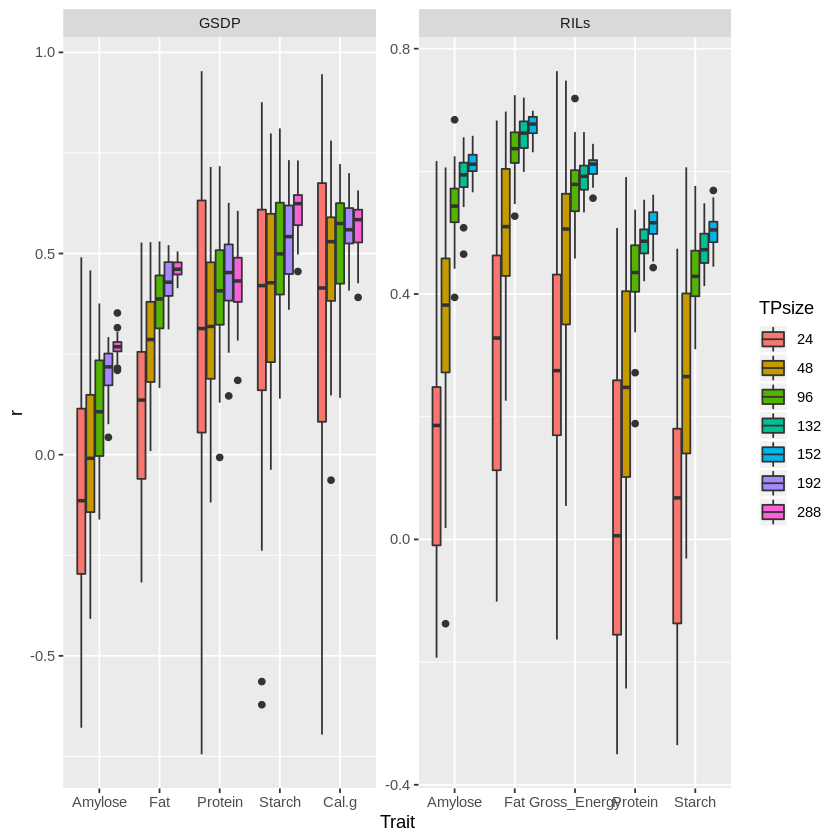

In [37]:
df = rbind(RIL,GSDP)

ggplot(df,aes(x=Trait,y=r, fill=TPsize)) + geom_boxplot() + facet_wrap(df$Pop~., scale='free')

In [35]:
traits <- rep(c('Protein','Starch'),each=30)
seeds <- rep(12345:12374, times=2)
df = cbind(traits,seeds)

write.csv(df,'scripts/Design_File/traits_seeds2.txt',row.names=F)